<span style="color: lightblue"><font size="15">EMBEDDING SPACE ANALYSIS</font></span>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [15]:
%config InlineBackend.figure_format='retina'

# For high dimensional embedding space    

In [7]:
representation_path = 'context_3/embedding_analysis/final_representations_0.csv'
representations = pd.read_csv(representation_path)

In [8]:

rep_contexts = representations.iloc[:, 0]
high_dim_data = representations.iloc[:, 1:]

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(high_dim_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Context'] = rep_contexts.values

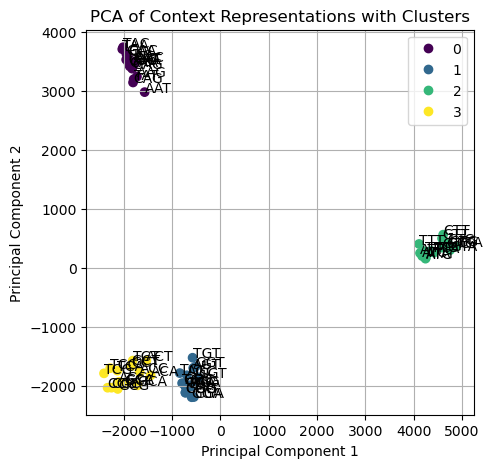

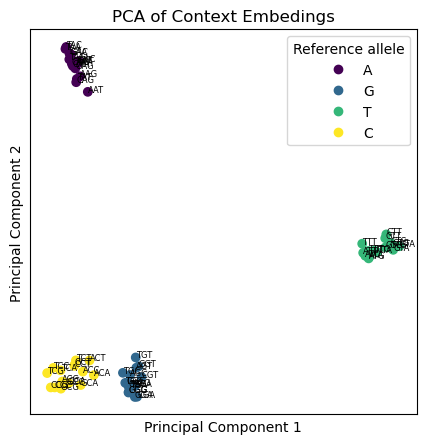

In [14]:

# Perform clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(reduced_data)
reduced_df['Cluster'] = clusters

# Save the cluster labels to a CSV file
clustered_df = reduced_df[['Context', 'Cluster']]
clustered_df.to_csv('../results/context_3/embedding_analysis/cluster_labels.csv', index=False)

# Plot the clustered data
plt.figure(figsize=(5,5))
scatter = plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(clusters)))
for i, context in enumerate(reduced_df['Context']):
    plt.text(reduced_df['PC1'][i], reduced_df['PC2'][i], context)
plt.title('PCA of Context Representations with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('../results/context_3/embedding_analysis/pca_cluster_plot.png')
plt.show()



# Perform clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(reduced_data)
reduced_df['Cluster'] = clusters

# Save the cluster labels to a CSV file
clustered_df = reduced_df[['Context', 'Cluster']]
clustered_df.to_csv('../results/context_3/embedding_analysis/cluster_labels.csv', index=False)

# Plot the clustered data
plt.figure(figsize=(5,5))
scatter = plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis')
# Custom legend labels
custom_labels = {0: 'A', 1: 'G', 2: 'T', 3: 'C'}
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=[custom_labels[label] for label in range(4)], title= 'Reference allele')

# Plot context labels with a small offset and smaller font size
offset = 0.02  # Adjust this value to move text further away
for i, context in enumerate(reduced_df['Context']):
    plt.text(reduced_df['PC1'][i] + offset, reduced_df['PC2'][i] + offset, 
             context, fontsize=6)

# Remove axis numbers
plt.xticks([])
plt.yticks([])

plt.title('PCA of Context Embedings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('../results/context_3/embedding_analysis/pca_cluster_plot.png')
plt.show()



In [6]:
# Check the columns in reduced_df to ensure correct column names
print(reduced_df.columns)


Index(['UMAP1', 'UMAP2', 'Context', 'Cluster'], dtype='object')


In [6]:
# Print the list of corresponding contexts for each cluster
for cluster_label in sorted(clustered_df['Cluster'].unique()):
    contexts_in_cluster = clustered_df[clustered_df['Cluster'] == cluster_label]['Context'].tolist()
    print(f"Cluster {cluster_label}: {contexts_in_cluster}")

Cluster 0: ['AAA', 'AAC', 'AAG', 'AAT', 'CAA', 'CAC', 'CAG', 'CAT', 'GAA', 'GAC', 'GAG', 'GAT', 'TAA', 'TAC', 'TAG', 'TAT']
Cluster 1: ['AGA', 'AGC', 'AGG', 'AGT', 'CGA', 'CGC', 'CGG', 'CGT', 'GGA', 'GGC', 'GGG', 'GGT', 'TGA', 'TGC', 'TGG', 'TGT']
Cluster 2: ['ATA', 'ATC', 'ATG', 'ATT', 'CTA', 'CTC', 'CTG', 'CTT', 'GTA', 'GTC', 'GTG', 'GTT', 'TTA', 'TTC', 'TTG', 'TTT']
Cluster 3: ['ACA', 'ACC', 'ACG', 'ACT', 'CCA', 'CCC', 'CCG', 'CCT', 'GCA', 'GCC', 'GCG', 'GCT', 'TCA', 'TCC', 'TCG', 'TCT']


In [7]:
### Sequences cluster by middle letter not by most likely predicted letter 

/omics/groups/OE0606/internal/jonas/miniconda/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


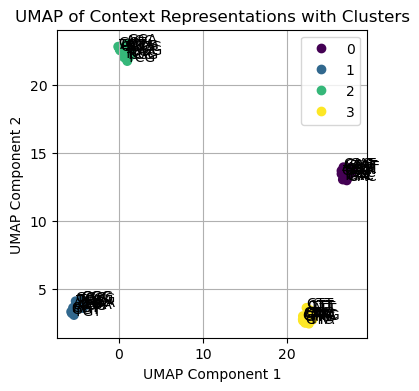

NameError: name 'clustered_df' is not defined

In [3]:
import umap

rep_contexts = representations.iloc[:, 0]
high_dim_data = representations.iloc[:, 1:]

# Applying UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, random_state=0)
reduced_data = umap_reducer.fit_transform(high_dim_data)
reduced_df = pd.DataFrame(reduced_data, columns=['UMAP1', 'UMAP2'])
reduced_df['Context'] = rep_contexts.values

# Perform clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(reduced_data)
reduced_df['Cluster'] = clusters

# Plot the clustered data
plt.figure(figsize=(4, 4))
scatter = plt.scatter(reduced_df['UMAP1'], reduced_df['UMAP2'], c=reduced_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(clusters)))
for i, context in enumerate(reduced_df['Context']):
    plt.text(reduced_df['UMAP1'][i], reduced_df['UMAP2'][i], context)
plt.title('UMAP of Context Representations with Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.savefig('../results/context_3/embedding_analysis/umap_cluster_plot.png')
plt.show()

# Print the list of corresponding contexts for each cluster
for cluster_label in sorted(clustered_df['Cluster'].unique()):
    contexts_in_cluster = clustered_df[clustered_df['Cluster'] == cluster_label]['Context'].tolist()
    print(f"Cluster {cluster_label}: {contexts_in_cluster}")


#   For low dimensional embedding space    

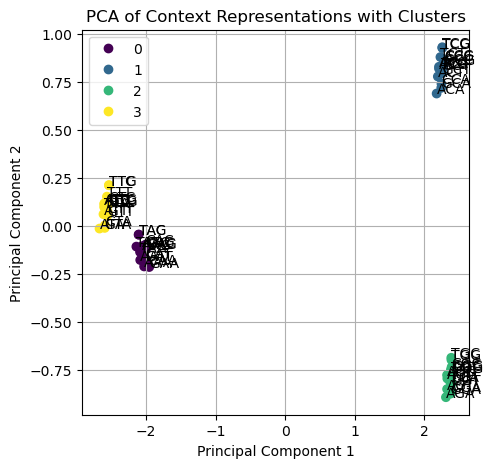

In [9]:
representation_path = 'context_3/embedding_analysis_nEmbd4/final_representations_0.csv'
representations = pd.read_csv(representation_path)

rep_contexts = representations.iloc[:, 0]
high_dim_data = representations.iloc[:, 1:]

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(high_dim_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Context'] = rep_contexts.values


# Perform clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(reduced_data)
reduced_df['Cluster'] = clusters

# Save the cluster labels to a CSV file
clustered_df = reduced_df[['Context', 'Cluster']]
clustered_df.to_csv('../results/context_3/embedding_analysis_nEmbd4/cluster_labels.csv', index=False)

# Plot the clustered data
plt.figure(figsize=(5,5))
scatter = plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(clusters)))
for i, context in enumerate(reduced_df['Context']):
    plt.text(reduced_df['PC1'][i], reduced_df['PC2'][i], context)
plt.title('PCA of Context Representations with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('../results/context_3/embedding_analysis_nEmbd4/pca_cluster_plot.png')
plt.show()

In [10]:
# Print the list of corresponding contexts for each cluster
for cluster_label in sorted(clustered_df['Cluster'].unique()):
    contexts_in_cluster = clustered_df[clustered_df['Cluster'] == cluster_label]['Context'].tolist()
    print(f"Cluster {cluster_label}: {contexts_in_cluster}")

Cluster 0: ['AAA', 'AAC', 'AAG', 'AAT', 'CAA', 'CAC', 'CAG', 'CAT', 'GAA', 'GAC', 'GAG', 'GAT', 'TAA', 'TAC', 'TAG', 'TAT']
Cluster 1: ['ACA', 'ACC', 'ACG', 'ACT', 'CCA', 'CCC', 'CCG', 'CCT', 'GCA', 'GCC', 'GCG', 'GCT', 'TCA', 'TCC', 'TCG', 'TCT']
Cluster 2: ['AGA', 'AGC', 'AGG', 'AGT', 'CGA', 'CGC', 'CGG', 'CGT', 'GGA', 'GGC', 'GGG', 'GGT', 'TGA', 'TGC', 'TGG', 'TGT']
Cluster 3: ['ATA', 'ATC', 'ATG', 'ATT', 'CTA', 'CTC', 'CTG', 'CTT', 'GTA', 'GTC', 'GTG', 'GTT', 'TTA', 'TTC', 'TTG', 'TTT']


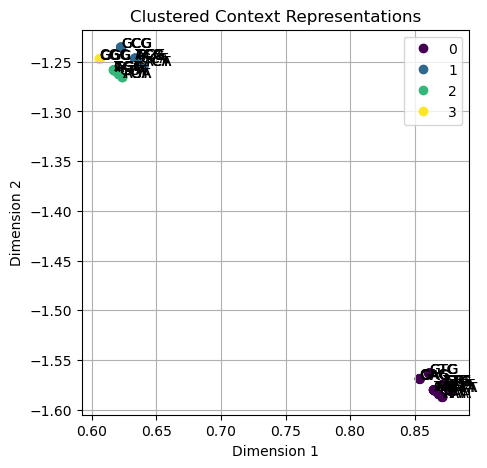

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
representation_path = 'context_3/embedding_analysis_nEmbd2/final_representations_0.csv'
representations = pd.read_csv(representation_path)

# Extract context and high-dimensional data
rep_contexts = representations.iloc[:, 0]
high_dim_data = representations.iloc[:, 1:]

# Perform clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(high_dim_data)
representations['Cluster'] = clusters
representations['Context'] = rep_contexts

# Save the cluster labels to a CSV file
clustered_df = representations[['Context', 'Cluster']]
clustered_df.to_csv('../results/context_3/embedding_analysis_nEmbd2/cluster_labels.csv', index=False)

# Plot the clustered data
plt.figure(figsize=(5, 5))
scatter = plt.scatter(representations.iloc[:, 1], representations.iloc[:, 2], c=representations['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(clusters)))
for i, context in enumerate(rep_contexts):
    plt.text(representations.iloc[i, 1], representations.iloc[i, 2], context)
plt.title('Clustered Context Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.savefig('../results/context_3/embedding_analysis_nEmbd2/clustered_plot.png')
plt.show()


In [14]:
# Print the list of corresponding contexts for each cluster
for cluster_label in sorted(clustered_df['Cluster'].unique()):
    contexts_in_cluster = clustered_df[clustered_df['Cluster'] == cluster_label]['Context'].tolist()
    print(f"Cluster {cluster_label}: {contexts_in_cluster}")

Cluster 0: ['AAA', 'AAC', 'AAG', 'AAT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TTA', 'TTC', 'TTG', 'TTT']
Cluster 1: ['ACA', 'ACC', 'ACG', 'ACT', 'CCA', 'CCC', 'CCG', 'CCT', 'GCA', 'GCC', 'GCG', 'GCT', 'TCA', 'TCC', 'TCG', 'TCT']
Cluster 2: ['AGA', 'AGC', 'AGG', 'AGT', 'CGA', 'CGT', 'GGA', 'GGT', 'TGA', 'TGC', 'TGG', 'TGT']
Cluster 3: ['CGC', 'CGG', 'GGC', 'GGG']


In [ ]:
# observations: Inputs cluster by middle letter, also for n_embd=4,2
# G and C cluster are close or T and A cluster are close or mixed for dim=2
# did i do it at the correct position in the code?

# For Task 2

##  function

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import umap
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="n_jobs value -1 overridden to 1 by setting random_state")
warnings.filterwarnings("ignore", message="Graph is not fully connected, spectral embedding may not work as expected.")

def analyze_embeddings(folder_path, fig_size=16):
    representation_file = None
    results_file = None

    for file_name in os.listdir(folder_path):
        if file_name.startswith('final_representations'):  representation_file = file_name
        elif file_name.startswith('results'): results_file = file_name

    if representation_file is None or results_file is None:
        raise FileNotFoundError("Required files not found in the specified folder")

    # Load representations and context
    representation_path = os.path.join(folder_path, representation_file)
    representations = pd.read_csv(representation_path)
    rep_contexts = representations.iloc[:, 0]
    high_dim_data = representations.iloc[:, 1:]

    # Applying UMAP for dimensionality reduction
    umap_reducer = umap.UMAP(n_components=2, random_state=0)
    reduced_data = umap_reducer.fit_transform(high_dim_data)
    reduced_df = pd.DataFrame(reduced_data, columns=['UMAP1', 'UMAP2'])
    reduced_df['Context'] = rep_contexts.values

    # Load results CSV
    results_path = os.path.join(folder_path, results_file)
    results = pd.read_csv(results_path)

    # Merge UMAP results with predictions and actual letters
    merged_df = reduced_df.merge(results, left_on='Context', right_on='sample')

    # Columns to plot
    columns_to_plot = ['predicted_mutation', 'actual_mutation', 'first_letter', 'middle_letter', 'last_letter']
    titles = {
        'predicted_mutation': 'Predicted Mutation',
        'actual_mutation': 'Actual Mutation',
        'first_letter': 'First Letter',
        'middle_letter': 'Middle Letter',
        'last_letter': 'Last Letter'
    }

    # Collect all unique letters from the columns to be plotted
    all_unique_letters = ['A', 'C', 'G', 'T']
    # Create a color mapping
    color_mapping = {letter: idx for idx, letter in enumerate(sorted(all_unique_letters))}

    # Function to get colors based on the color mapping
    def get_colors(column_data):
        return column_data.map(color_mapping)

    # Loop to generate plots
    for column in columns_to_plot:
        plt.figure(figsize=(fig_size, fig_size))
        colors = get_colors(merged_df[column])

        scatter = plt.scatter(merged_df['UMAP1'], merged_df['UMAP2'], c=colors, cmap='viridis', s=3)
        plt.title(f'UMAP of Context Representations Colored by {titles[column]}')
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.grid(False)

        # Create custom legend
        handles, _ = scatter.legend_elements()
        labels = sorted(all_unique_letters, key=lambda x: color_mapping[x])
        plt.legend(handles, labels, title=titles[column])
        plot_path = os.path.join(folder_path, f'umap_{column}_plot.png')
        plt.savefig(plot_path)
        plt.show()

    return merged_df

In [62]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
import warnings
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", message="n_jobs value -1 overridden to 1 by setting random_state")
warnings.filterwarnings("ignore", message="Graph is not fully connected, spectral embedding may not work as expected.")

def letter_combi_clusters(merged_df, folder_path, model_name, letter_option='first_two', fig_size=16):
    # Determine which letters to use based on the letter_option
    if letter_option == 'first_two':
        merged_df['selected_letters'] = merged_df['first_letter'] + merged_df['middle_letter']
        num_combinations = 16  # 4^2
    elif letter_option == 'last_two':
        merged_df['selected_letters'] = merged_df['middle_letter'] + merged_df['last_letter']
        num_combinations = 16  # 4^2
    elif letter_option == 'all_three':
        merged_df['selected_letters'] = merged_df['first_letter'] + merged_df['middle_letter'] + merged_df['last_letter']
        num_combinations = 64  # 4^3
    else:
        raise ValueError("Invalid letter_option. Choose from 'first_two', 'last_two', or 'all_three'.")

    # Generate all possible combinations
    expected_combinations = [''.join(comb) for comb in itertools.product('ACGT', repeat=len(merged_df['selected_letters'][0]))]
    
    # Ensure all expected combinations are accounted for in the color mapping
    combinations_mapping = {combo: idx for idx, combo in enumerate(expected_combinations)}

    # Map colors
    colors = merged_df['selected_letters'].map(combinations_mapping)
    # Plot the selected letters
    plt.figure(figsize=(fig_size, fig_size))

    if letter_option != 'all_three':
        cmap = 'tab20'
    else:
        cmap = matplotlib.colors.ListedColormap(plt.cm.gist_ncar(np.linspace(0, 1, 64)))

    scatter = plt.scatter(merged_df['UMAP1'], merged_df['UMAP2'], c=colors, cmap=cmap, s=3)

    plt.title(f'UMAP of Context Representations Colored by Selected Letters ({letter_option})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.grid(False)

    # Create custom legend
    if letter_option != 'all_three':
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab20(combinations_mapping[combo] / (num_combinations - 1)), markersize=6) for combo in expected_combinations]
    else:
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.gist_ncar(combinations_mapping[combo] / (num_combinations - 1)), markersize=6) for combo in expected_combinations]

    labels = expected_combinations
    plt.legend(handles, labels, title="Selected Letters", bbox_to_anchor=(1.05, 1), loc='upper left')
    plot_path = os.path.join(folder_path, f'umap_selected_letters_plot_{model_name}_{letter_option}.png')
    plt.savefig(plot_path)
    plt.show()

## results

### model G

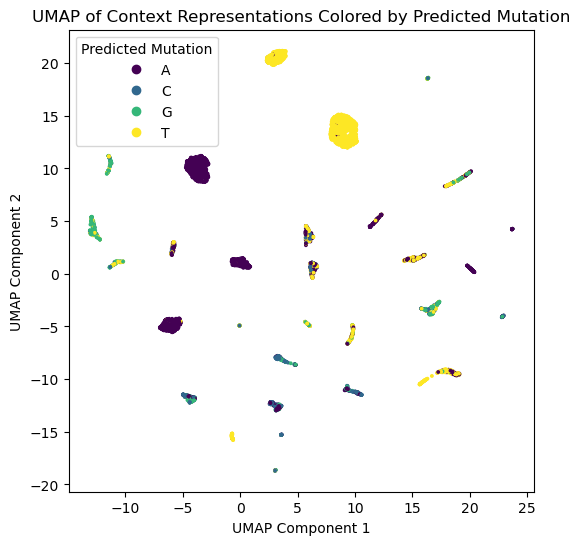

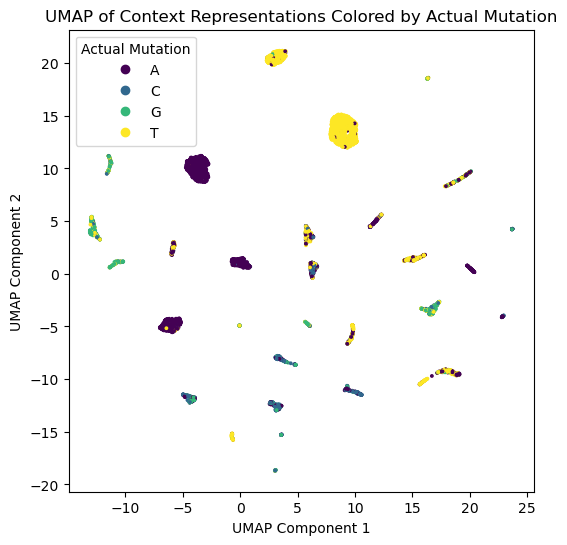

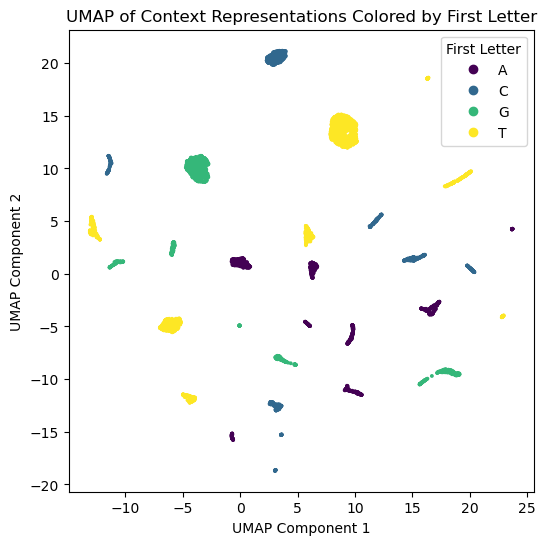

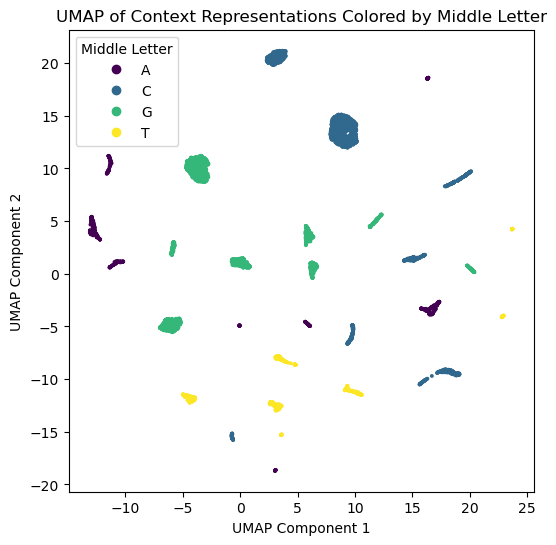

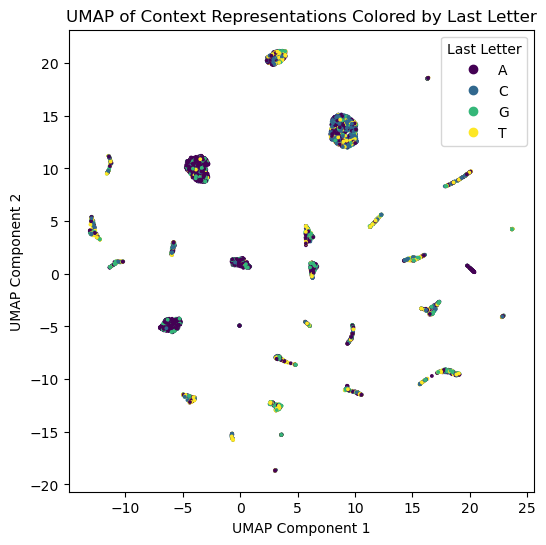

In [19]:
modelG_path = 'architecture_2/context_3/embedding_analysis_modelG'
modelG = analyze_embeddings(modelG_path, fig_size=6)

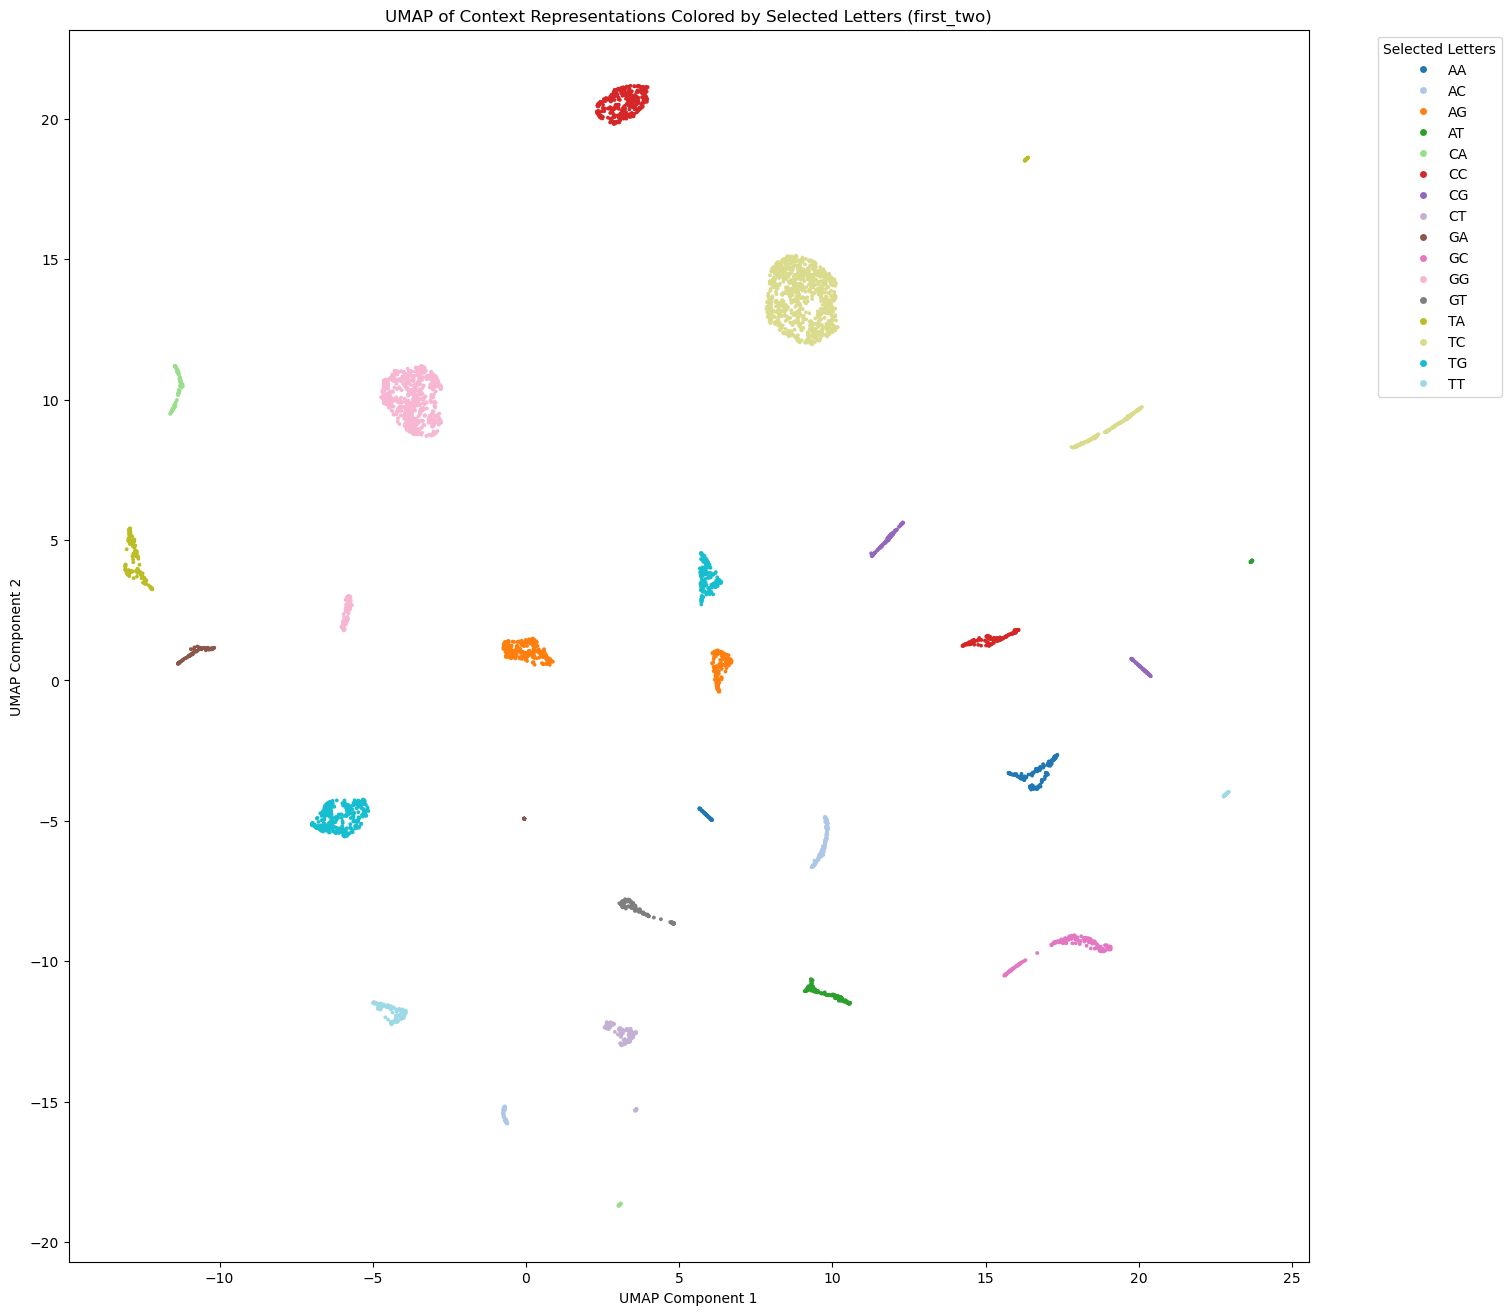

In [37]:
folder_path = 'architecture_2/context_3/embedding_analysis_modelG'
letter_combi_clusters(modelG, folder_path, 'G', 'first_two', fig_size=16)  # Replace with 'first_two', 'last_two', or 'all_three'

In [34]:
merged_df.head(5) 

,UMAP1,UMAP2,Context,sample,first_letter,middle_letter,last_letter,predicted_mutation,actual_mutation,first_two_letters
0,-5.621390,-4.731854,0,0,T,G,A,A,A,TG
1,3.575313,-15.306923,1,1,C,T,G,A,C,CT
2,7.887470,12.948024,2,2,T,C,T,T,T,TC
3,19.068571,-9.561368,3,3,G,C,T,T,T,GC
4,-11.446939,11.178067,4,4,C,A,A,T,G,CA


### model H

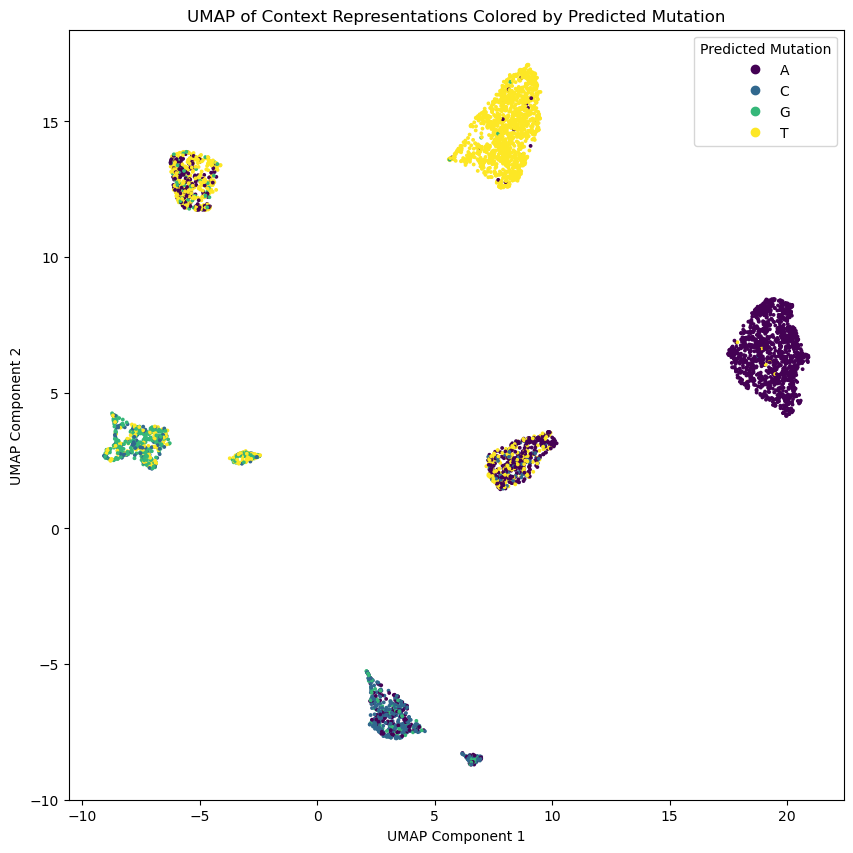

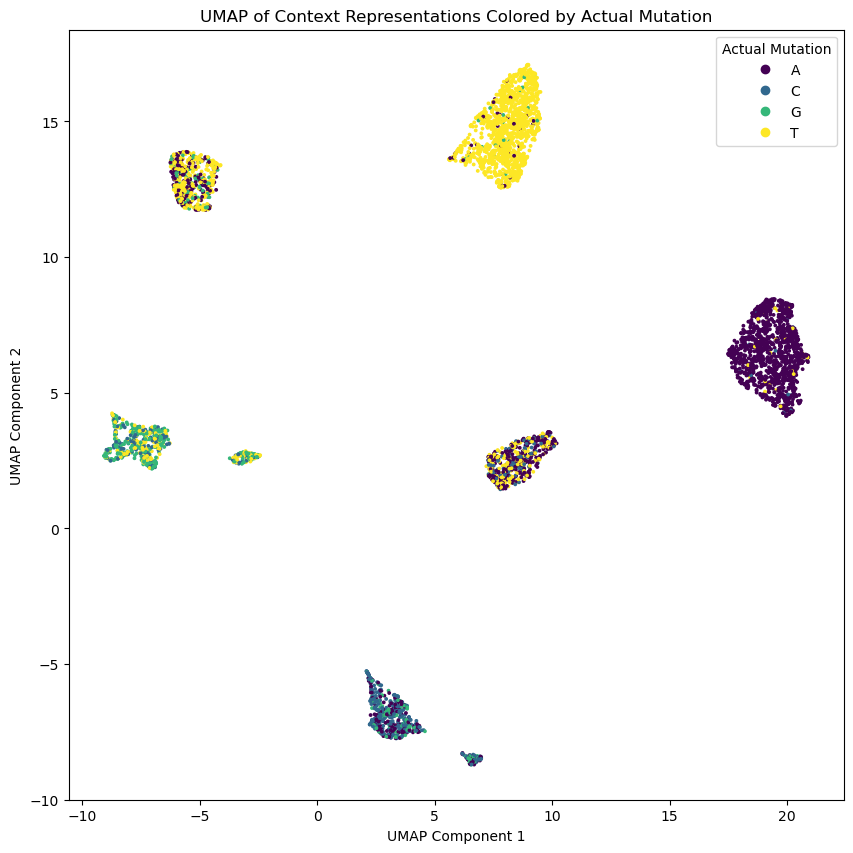

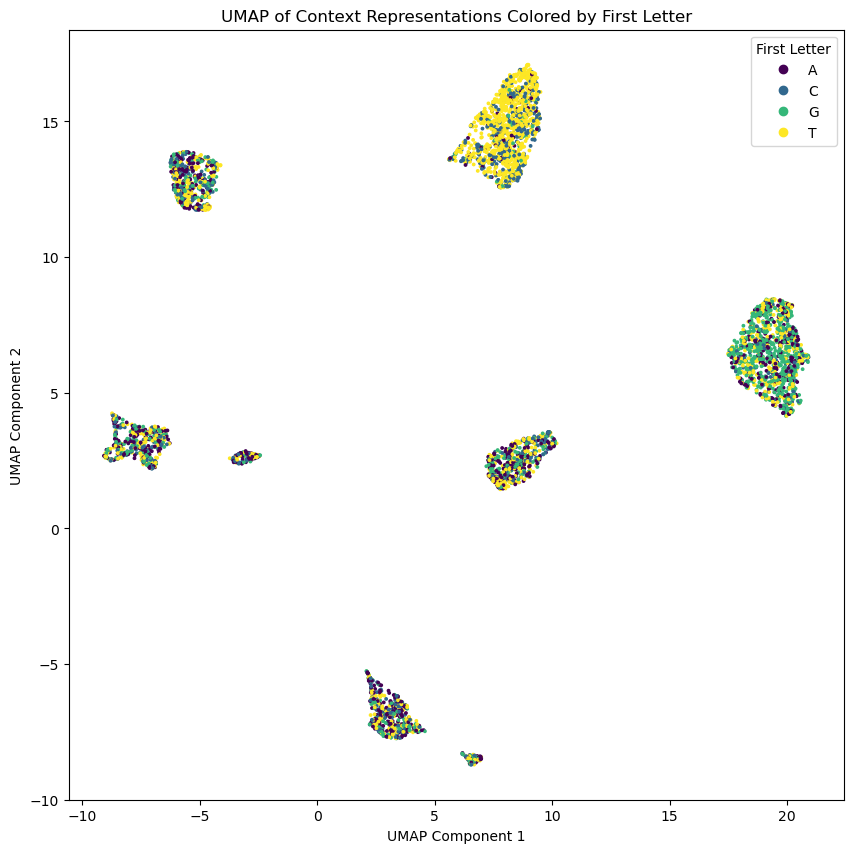

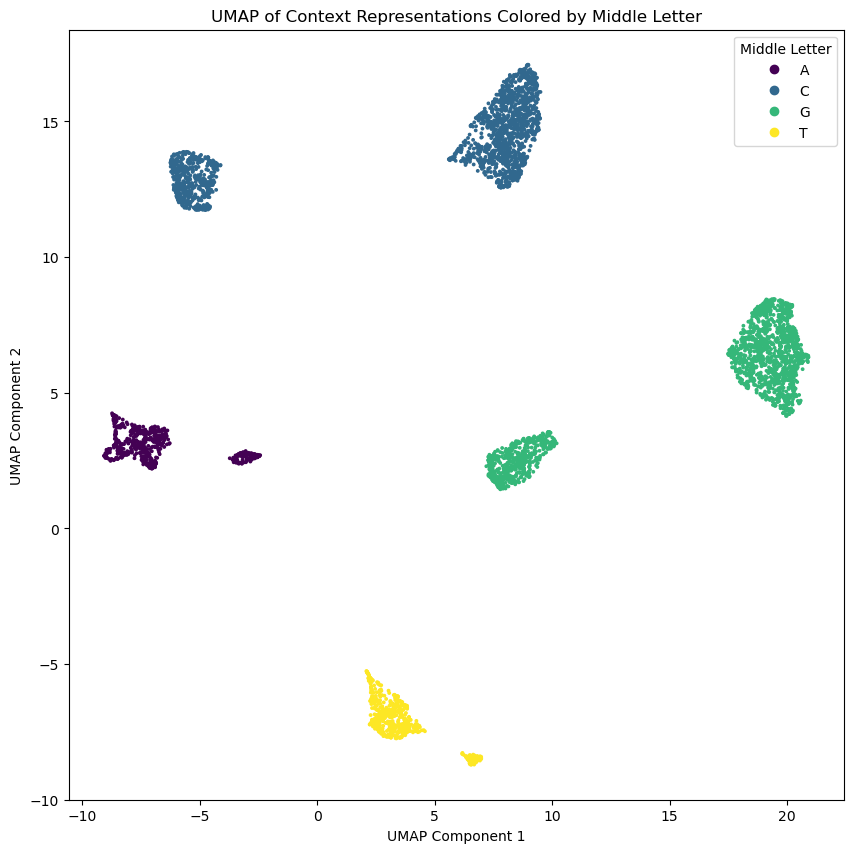

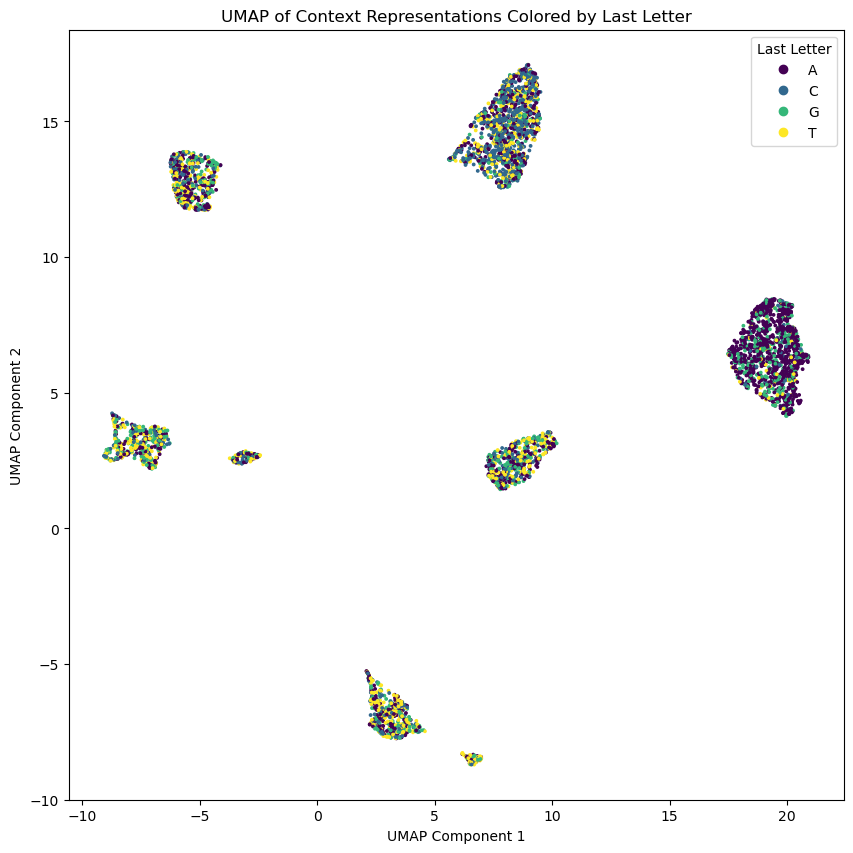

In [27]:
modelH_path = 'architecture_2/context_3/embedding_analysis_model_H'
modelH = analyze_embeddings(modelH_path, fig_size=10)

### model I

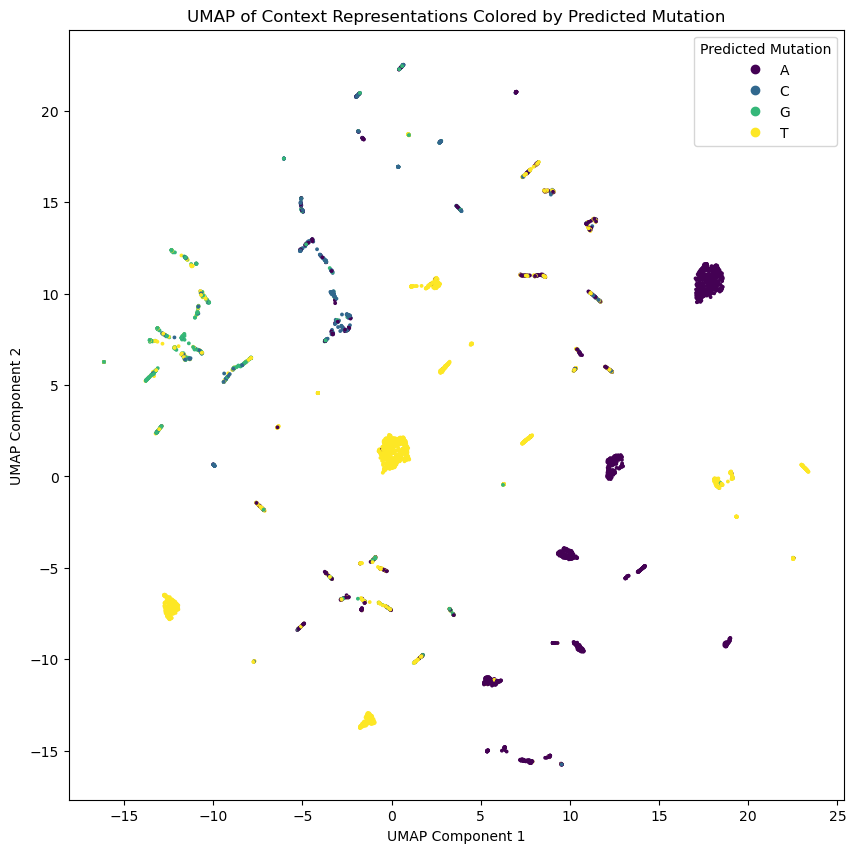

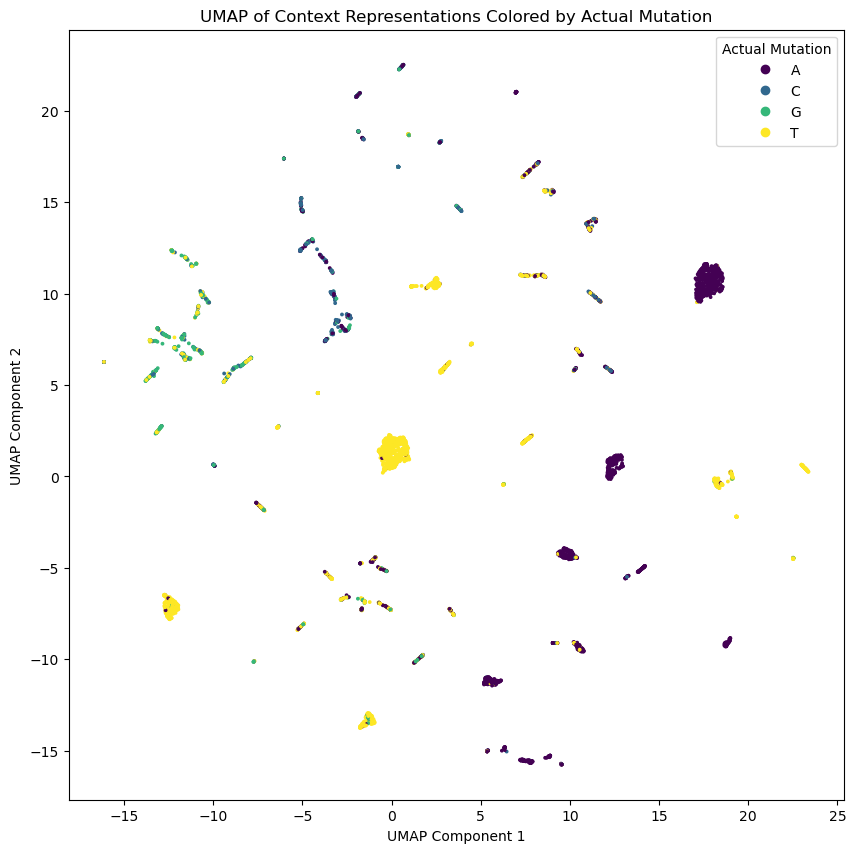

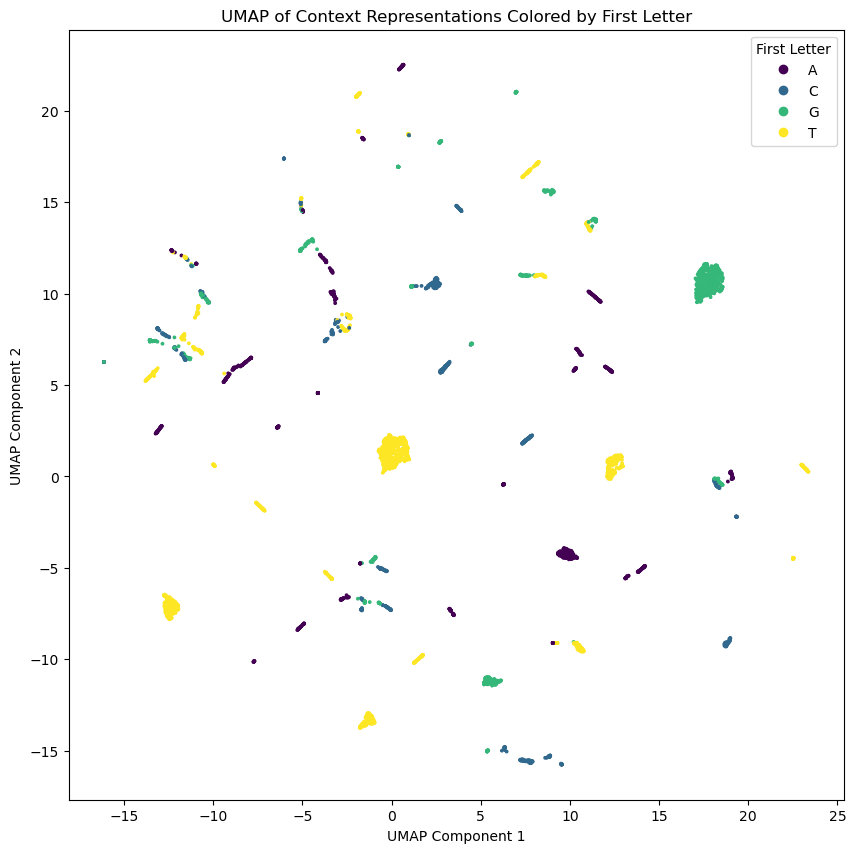

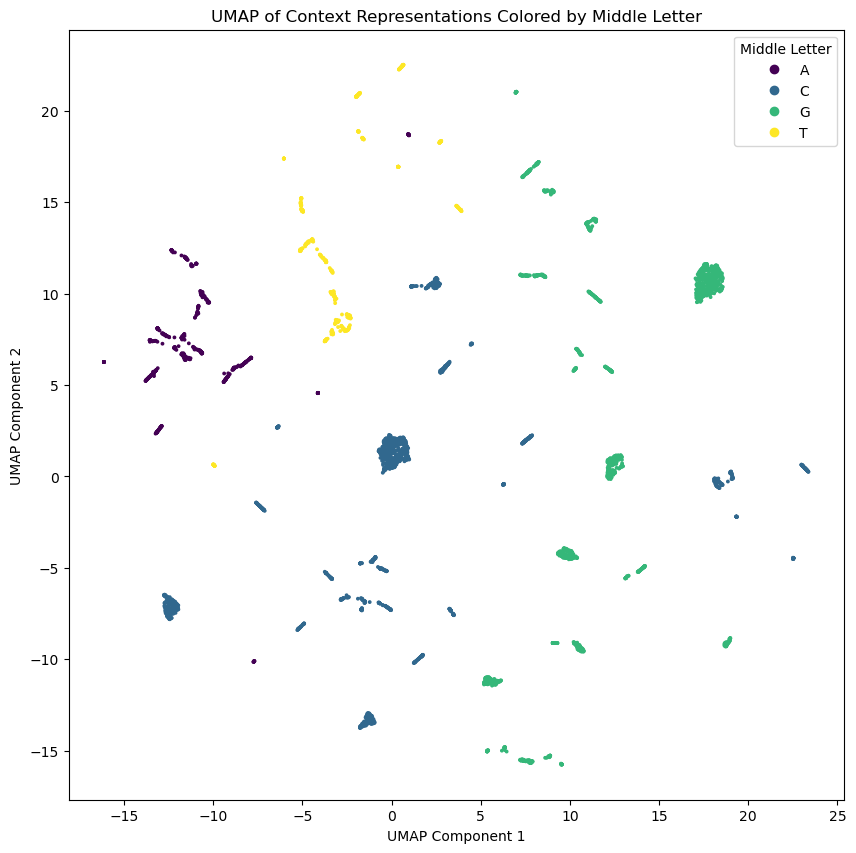

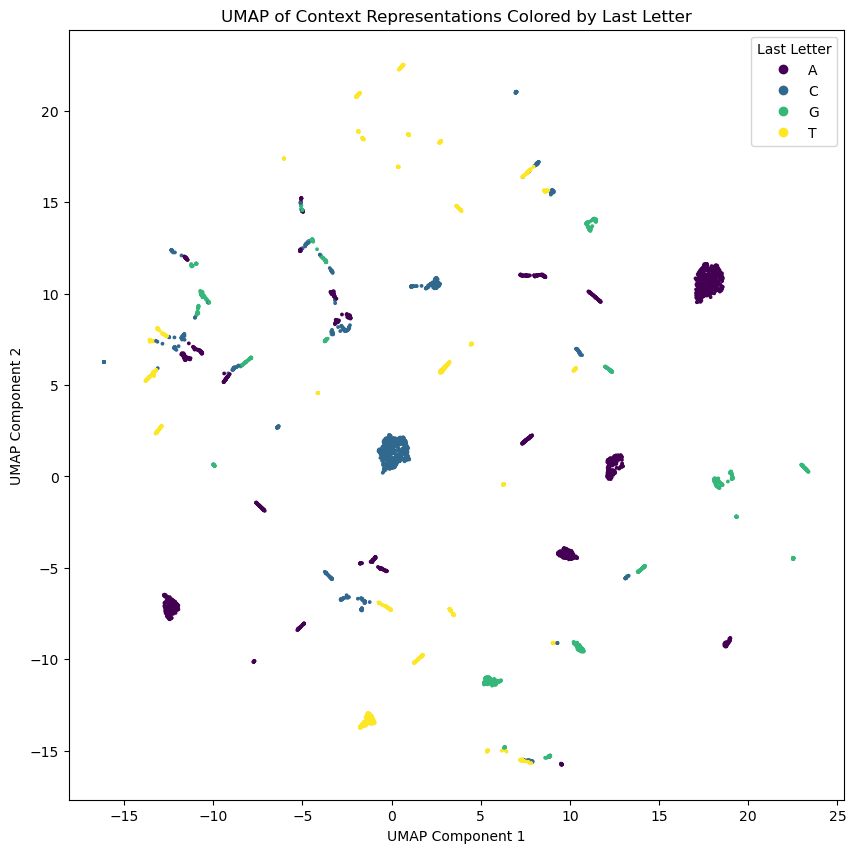

In [28]:
modelI_path = 'architecture_2/context_3/embedding_analysis_model_I'
modelI = analyze_embeddings(modelI_path, fig_size=10)

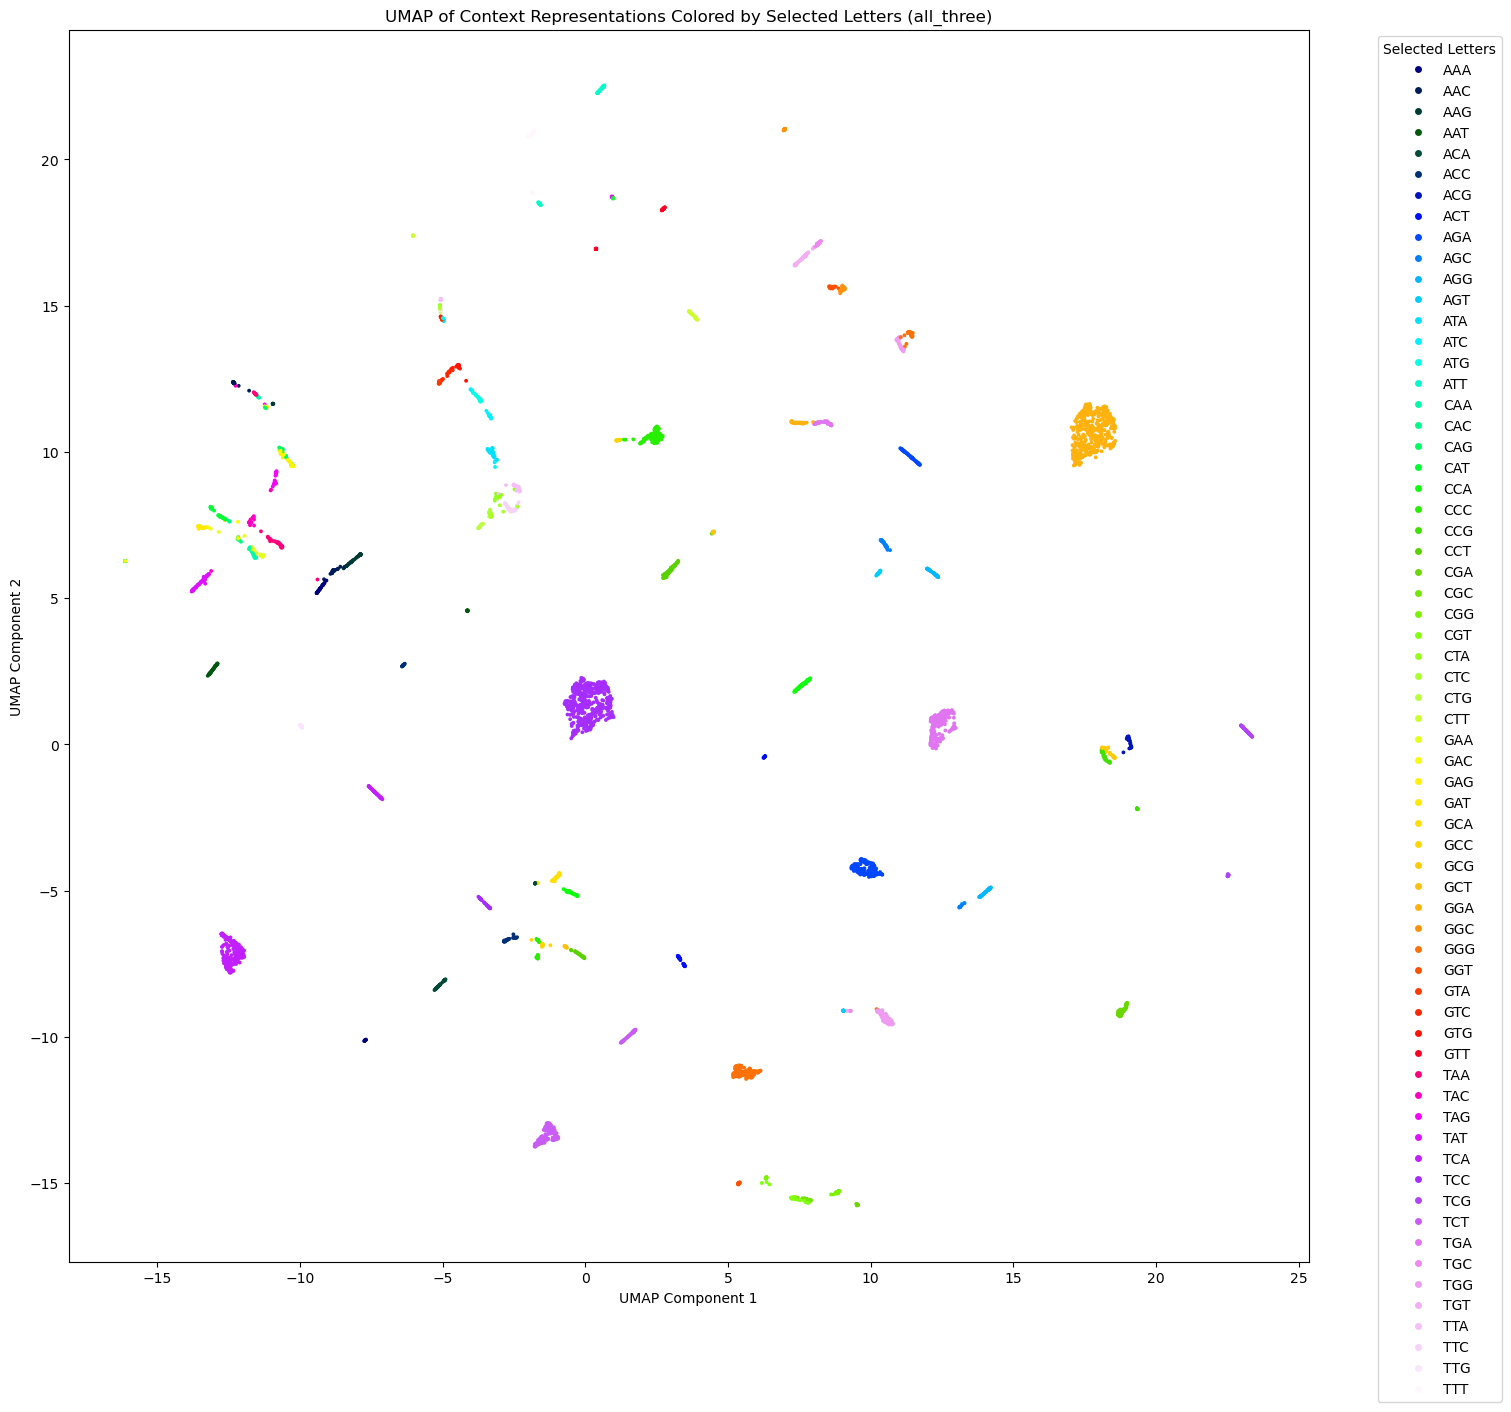

In [63]:
folder_path_I = 'architecture_2/context_3/embedding_analysis_model_I'
letter_combi_clusters(modelI, folder_path_I, 'I', 'all_three', fig_size=16)  # Replace with 'first_two', 'last_two', or 'all_three'

In [64]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
import warnings
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", message="n_jobs value -1 overridden to 1 by setting random_state")
warnings.filterwarnings("ignore", message="Graph is not fully connected, spectral embedding may not work as expected.")

def letter_combi_clusters(merged_df, folder_path, model_name, letter_option='first_two', fig_size=16):
    # Determine which letters to use based on the letter_option
    if letter_option == 'first_two':
        merged_df['selected_letters'] = merged_df['first_letter'] + merged_df['middle_letter']
        num_combinations = 16  # 4^2
    elif letter_option == 'last_two':
        merged_df['selected_letters'] = merged_df['middle_letter'] + merged_df['last_letter']
        num_combinations = 16  # 4^2
    elif letter_option == 'all_three':
        merged_df['selected_letters'] = merged_df['first_letter'] + merged_df['middle_letter'] + merged_df['last_letter']
        num_combinations = 64  # 4^3
    else:
        raise ValueError("Invalid letter_option. Choose from 'first_two', 'last_two', or 'all_three'.")

    # Generate all possible combinations
    expected_combinations = [''.join(comb) for comb in itertools.product('ACGT', repeat=len(merged_df['selected_letters'][0]))]
    
    # Ensure all expected combinations are accounted for in the color mapping
    combinations_mapping = {combo: idx for idx, combo in enumerate(expected_combinations)}

    # Map colors
    colors = merged_df['selected_letters'].map(combinations_mapping)
    # Plot the selected letters
    plt.figure(figsize=(fig_size, fig_size))

    if letter_option != 'all_three':
        cmap = 'tab20'
    else:
        cmap = matplotlib.colors.ListedColormap(plt.cm.gist_ncar(np.linspace(0, 1, 64)))

    scatter = plt.scatter(merged_df['UMAP1'], merged_df['UMAP2'], c=colors, cmap=cmap, s=3)

    plt.title(f'UMAP of Context Representations Colored by Selected Letters ({letter_option})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.grid(False)

    # Calculate and plot centroids
    for combo in expected_combinations:
        subset = merged_df[merged_df['selected_letters'] == combo]
        if not subset.empty:
            centroid = subset[['UMAP1', 'UMAP2']].mean()
            plt.text(centroid['UMAP1'], centroid['UMAP2'], combo, fontsize=8, ha='center')

    # Create custom legend
    if letter_option != 'all_three':
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab20(combinations_mapping[combo] / (num_combinations - 1)), markersize=6) for combo in expected_combinations]
    else:
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.gist_ncar(combinations_mapping[combo] / (num_combinations - 1)), markersize=6) for combo in expected_combinations]

    labels = expected_combinations
    plt.legend(handles, labels, title="Selected Letters", bbox_to_anchor=(1.05, 1), loc='upper left')
    plot_path = os.path.join(folder_path, f'umap_selected_letters_plot_{model_name}_{letter_option}.png')
    plt.savefig(plot_path)
    plt.show()

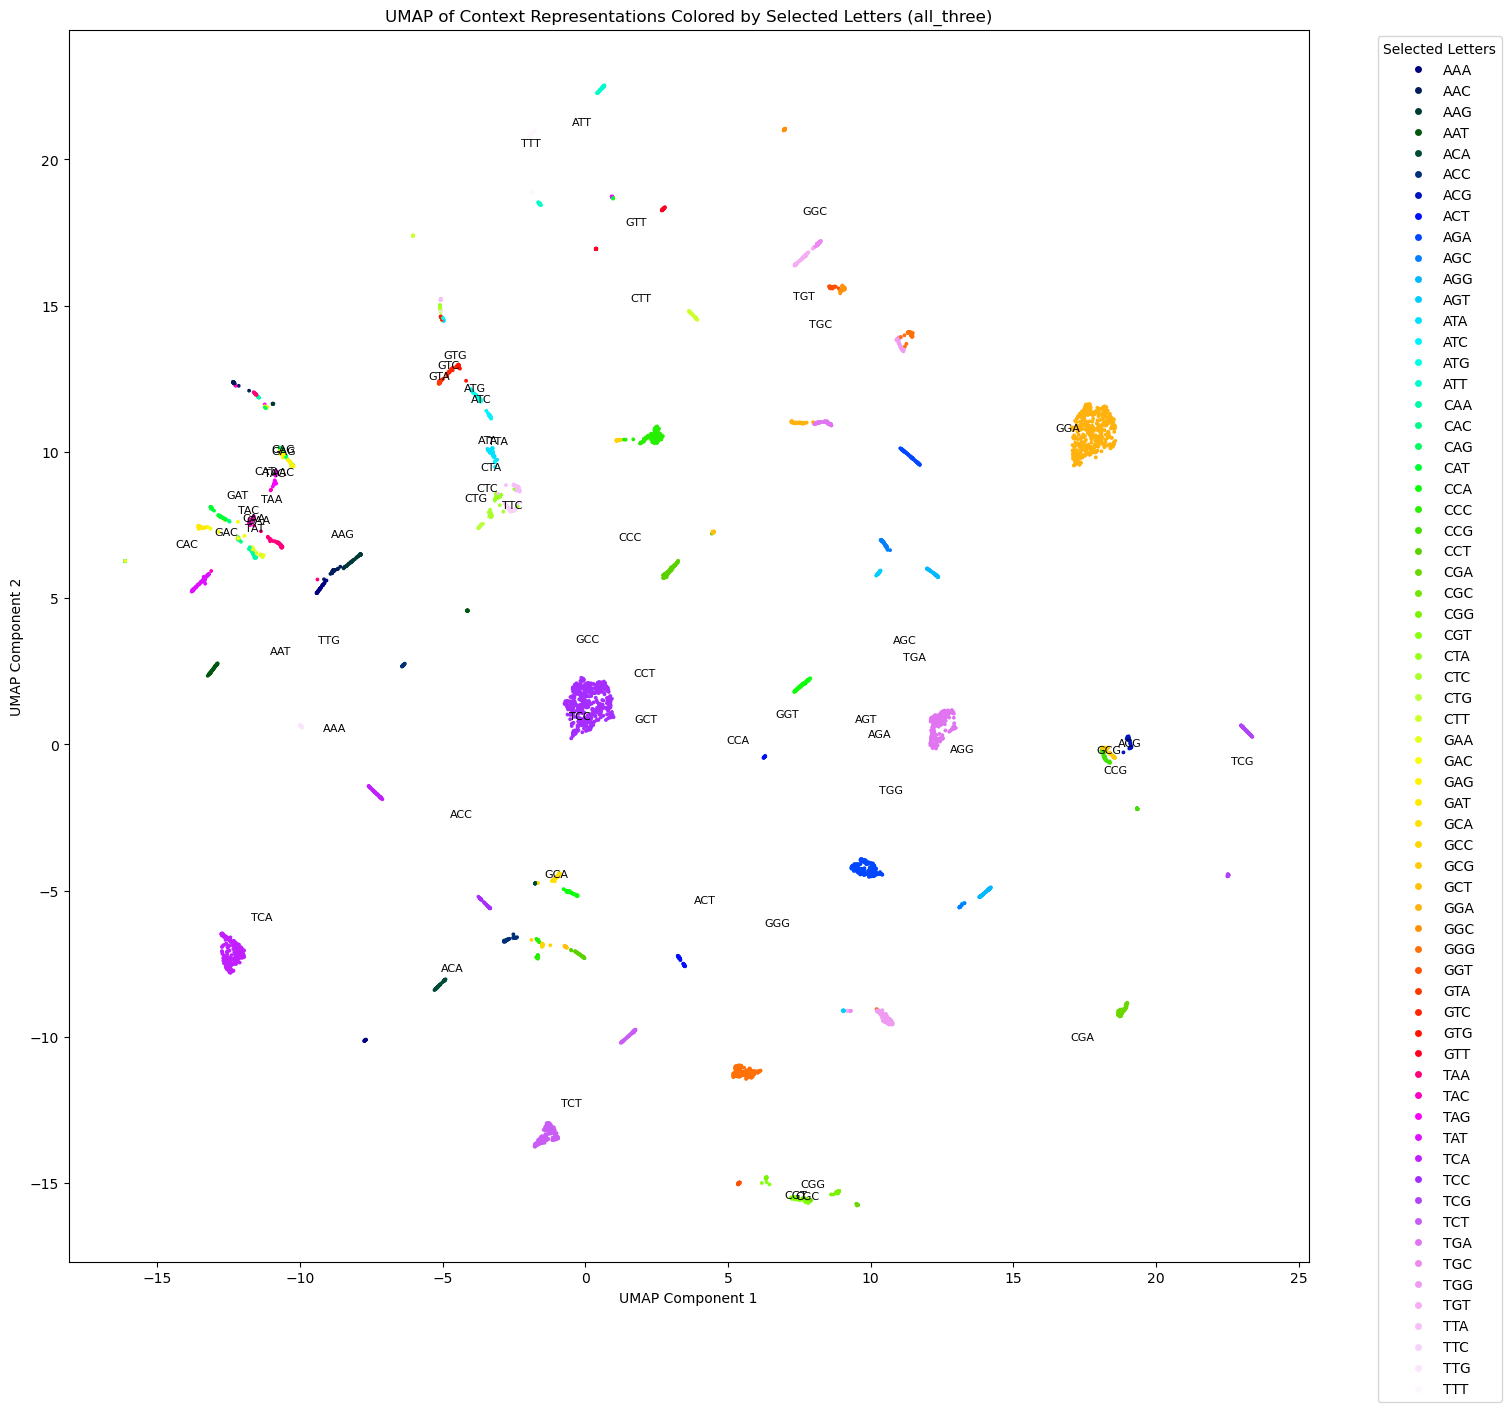

In [65]:
folder_path_I = 'architecture_2/context_3/embedding_analysis_model_I'
letter_combi_clusters(modelI, folder_path_I, 'I', 'all_three', fig_size=16)  # Replace with 'first_two', 'last_two', or 'all_three'